In [19]:
import numpy as np 
import pandas as pd 
from datetime import datetime
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta

## Jump Diffusion Processes
Extend the Black-Scholes model by independentt jumps, driven by a Poisson Processes. Considering $X(t)=logS(t)$, under the real-world measure $\mathbb{P}$,
$$dX(t) = udt + \sigma dW^\mathbb{P}(t) + JdX_{\mathbf{P}}((t))$$

where $u$ is the drift, $\sigma$ is the volatility, $X_{\mathbf{P}}$ is a Poisson process and $J$ gives the jump magnitude, driven by a chosen distribution, $F_j$, of magnitudes.
$W^\mathbb{P}(t)$ and $X_{\mathbf{P}}(t)$ are assumed to be indipendent

# Definition: Poisson random variable
$X_{\mathbf{P}}(t)$ counts the number of occurences of an event during a given time period. The Probability of observing $k\geq 0$ occurences in a time period:
- $$ P[X_{\mathbf{P}} = k] = \frac{\xi_p^k e^{-\xi{_p}}}{k!}$$
- $$ \mathbb{E}[X_{\mathbf{P}}]= \xi{_p}$$
- $$\mathbb{V}ar(X_{\mathbf{P}}) = \xi_{p}$$

## Definition: Poisson Process
- $X_{\mathbf{P}}(0)$ = 0$
- $\forall t$, $ X_{\mathbf{P}}(t_n) - X_{\mathbf{P}}(t_n-1)$ are independent random variables (independent increments)
- Increments have a Poisson distribution:
$$  P[X_{\mathbf{P}(s+t)} - X_{\mathbf{P}(s)} = k] = \frac{(\xi_p^kt) e^{-\xi{_p}t}}{k!}$$
for $0<s<t$ and $k\geq0$
$X_{\mathbf{P}}(t)$ is a counting process: a process counting the number of jumps in a time period of length t.

## Details
The probability that exactly one event occurs in small time period $dt$:
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 1] = \frac{(\xi_pdt) e^{-\xi{_p}dt}}{1!}$ = $\xi_pdt + \omicron(dt)$ <br> <br>
and the probability that no event occurs id $dt$ is: 
- $P[X_{\mathbf{P}(s+dt)} - X_{\mathbf{P}(s)} = 0] = e^{-\xi{_p}dt}=1 - \xi_pdt + \omicron(dt)$

In $dt$, a jump will arrive with probability $\xi_pdt$:
- $$ \mathbb{E}[dX_{\mathbf{P}}]= \xi{_p}dt = 1 \cdot \xi_pdt + 0 \cdot e^{-\xi{_p}dt}$$


## Requirement
The Brownian motion increments have a nice property: the Expected value is 0.
The expected value of the increment of a Poisson process $ \mathbb{E}[dX_{\mathbf{P}}]$ is not 0.
- We define the compensated Poisson Process $\bar{X}_{\mathbf{P}}$=$X_{\mathbf{P}} - \xi{_p}dt$, which is a martingale
- so that $\mathbb{E}[d\bar{X}_{\mathbf{P}}]= 0$

Given the following SDE:
$$ dX(t)= J(t)dX_{\mathbf{P}}(t)$$
we may define the stochastic integral with respect to the Poisson process $X_{\mathbf{P}}$, by:
$$ X(T) - X(t_0) = \int_{t_0}^{T} J(t)dX_{\mathbf{P}}(t) \coloneqq  \sum_{k=1}^{X_{\mathbf{P}(T)}}J_k$$

$J_k$ for $k \geq 1$ is an i.i.d. sequence of random variables with a jump size probability distribution $F_J$, so that $\mathbb{E}[J_k]=u_j<\infty$

## Code using a for loop

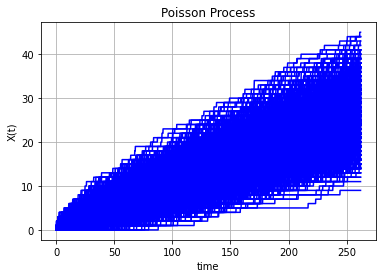

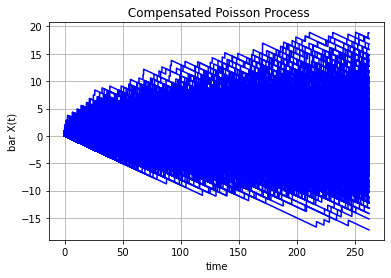

In [20]:
def GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP,seed=123): 
    """
    NoOfPaths (integer): The number of simulations
    NoOfSteps (integer): The number of steps in a single path
    T         (integer): The end period of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    X = np.zeros([NoOfPaths, NoOfSteps+1])
    Xc = np.zeros([NoOfPaths, NoOfSteps+1])
    time = np.zeros([NoOfSteps+1])
                
    dt = T / float(NoOfSteps)
    
    Z = np.random.poisson(xiP*dt,[NoOfPaths,NoOfSteps])
    
    for i in range(0,NoOfSteps):
        # making sure that samples from normal have mean 0 and variance 1
        X[:,i+1]  = X[:,i] + Z[:,i]
        Xc[:,i+1] = Xc[:,i] -xiP*dt + Z[:,i]
        time[i+1] = time[i] +dt
        
    paths = {"time":time,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 4000
    NoOfSteps = 4000
    T = 262
    xiP= 0.1
        
    Paths = GeneratePathsPoisson(NoOfPaths,NoOfSteps,T,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()

## Code using vectorization and datetime index

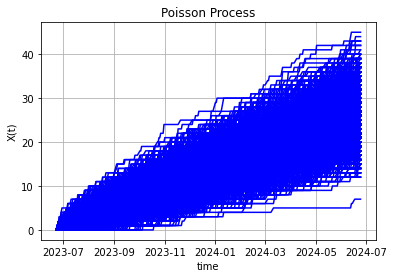

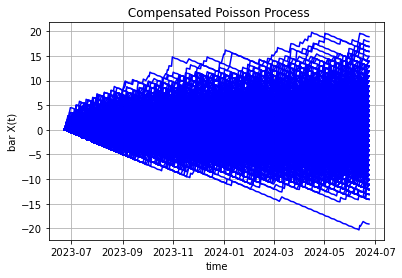

In [21]:
def GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP,seed=123):
    """
    NoOfPaths (integer): The number of simulations
    Start_date (string): start date for the simulation
    End_date  (string): The end date of the simulation
    xiP       (integer): Average number of occurences in a a single period
    """ 
    # Create empty matrices for Poisson process and for compensated Poisson process
    np.random.seed(seed)
    start_simulation_date=datetime.strptime(Start_date,"%Y-%m-%d")
    end_simulation_date=datetime.strptime(End_date,"%Y-%m-%d")
    date_range=pd.bdate_range(start_simulation_date,end_simulation_date+pd.tseries.offsets.BDay(1),freq="B")
    time =np.arange(1,len(date_range))
    X = np.zeros([NoOfPaths,len(time)+1])
    Xc = np.zeros([NoOfPaths, len(time)+1])
    dt=1 #by default
    Z = np.random.poisson(xiP*dt,[NoOfPaths,len(time)])
    # making sure that samples from normal have mean 0 and variance 1
    X[:,1:]= Z.cumsum(axis=1)
    Xc[:,1:] =  Z.cumsum(axis=1) - xiP *time
    paths = {"time":date_range,"X":X,"Xcomp":Xc}
    return paths

def mainCalculation():
    NoOfPaths = 4000
    Start_date=datetime.strftime((datetime.today() - relativedelta(years=1)),format="%Y-%m-%d")
    End_date= datetime.strftime((datetime.today()),format="%Y-%m-%d")
    xiP= 0.1
    Paths = GeneratePathsPoisson(NoOfPaths,Start_date,End_date,xiP)
    timeGrid = Paths["time"]
    X = Paths["X"]
    Xc = Paths["Xcomp"]
       
    plt.figure(1)
    plt.plot(timeGrid, np.transpose(X),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("X(t)")
    plt.title("Poisson Process")
    
    plt.figure(2)
    plt.plot(timeGrid, np.transpose(Xc),'-b')   
    plt.grid()
    plt.xlabel("time")
    plt.ylabel("bar X(t)")
    plt.title(" Compensated Poisson Process")                  
mainCalculation()

## Ito's Lemma and Jumps
To derive the dynamics for $S(t) = e^{X(t)} a variant of Ito's lemma related to the Poissomn process needs to be employed.
We consider a càdlàg process, $X(t)$, defined as:
$$dX(t) = u(t,X(t))dt + \bar{J}(t,X(t_-)) dX_{\mathbf{P}}(t)$$
where $t_-$ is the moment before the jump takes place 

for a differentiable function $g:[0,\infty) \times \mathbb{R} \rightarrow \mathbb{R} $ the Ito's diffeential reads:
$$ dg(t,X(t)) = \bigg[ \frac{\partial g(t,X(t))}{\partial t} + \bar{u}(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}\bigg] dt + \bigg[g(t,X(t_-) +  \bar{J}(t,X(t_-))) - g(t,X(t_-))\bigg]dX_{\mathbf{P}}(t)$$

Including the diffusion component the process $dX(t)$ becomes:
$$dX(t) = u(t,X(t))dt + \bar{J}(t,X(t_-)) dX_{\mathbf{P}}(t) + \sigma(t,X(t))dW(t) $$

Assuming the independence between $X_{\mathbf{P}}(t)$ and $W(t)$ the dynamic of $g(t,X(t))$ becomes: 
$$ dg(t,X(t)) = \bigg[ \frac{\partial g(t,X(t))}{\partial t} + \bar{u}(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}+ \frac{1}{2}\sigma^2(t,X(t))\frac{\partial^2 g(t,X(t))}{\partial^2 X}\bigg] dt + \bigg[g(t,X(t_-) +  \bar{J}(t,X(t_-))) - g(t,X(t_-))\bigg]dX_{\mathbf{P}}(t) \\
+ \sigma(t,X(t)) \frac{\partial g(t,X(t))}{\partial X}dW(t)$$

## Asset Dynamics under the $\mathbb{P}$ measure
To apply Ito's Lemma to the function $S(t) =e^{X(t)}$, substitute $\bar{u}(t,X(t))=u$, $\sigma(t,X(t))=\sigma$ and $ \bar{J}(t,X(t_-))=J$. 
Than:
- $ de^{X(t)}=(u + \frac{1}{2}\sigma^2)e^{X(t)}dt + \sigma e^{X(t)}dW(t) + (e^{X(t)+J}-1)dX_{\mathbf{P}}(t).$ <br> <br>
So that, we obtain: <br> <br>
- $ \frac{dS(t)}{S_t}=(u + \frac{1}{2}\sigma^2)dt + \sigma dW(t) + (e^{J}-1)dX_{\mathbf{P}}(t)$ <br>
Dynamics for stock $S(t)$ under the real world measure $\mathbb{P}$

## Risk Neutral $\mathbb{Q}$ measure 
Process dY(t)= \frac{S(t)}{M(t)}, where dM(t)=r(t)dt is the dynamic of a money market account. Than:
- $   dY(t) =\frac{dS(t)}{dM(t)} - \frac{r(S(t)dt)}{M(t)}$ should have zero expectation (driftless)$


From the fact that all random components in the expression above are mutually independent, we get:
- $ \mathbb{E}[dY(t)] =  \mathbb{E} \bigg[(u + \frac{1}{2}\sigma^2 - r) S(t)\bigg]dt + \mathbb{E} \bigg[ (e^{J}-1) S(t)\bigg]\xi_pdt + \mathbb{E} \bigg[\sigma S(t) dW(t)\bigg] $
- $dW^{\mathbb{Q}}(t)=dW(t) + \lambda(t)dt$
- $dX^{\mathbb{Q}}(t)_\mathbf{P}=dX(t)_\mathbf{P} + \gamma(t)dt$

-  $ \mathbb{E}[dY(t)] =  \bigg(u - r + \frac{1}{2}\sigma^2 +\xi_p\mathbb{E}[(e^{J}-1)] -\sigma \lambda(t) -\gamma(t)\bigg) \mathbb{E}[S(t)]dt + \mathbb{E} \bigg[\sigma S(t) dW^{\mathbb{Q}}(t)\bigg]$
-  By substituting $ \lambda(t) = \frac{u - r}{\sigma} + \frac{1}{2}\sigma$ and  $ \gamma(t) = \xi_p\mathbb{E}[e^J-1]$ we have $\mathbb{E}[dY(t)] = 0$ 
- the term $\xi_p\mathbb{E}[e^J-1]$ is the so called drift correction term
-  $ \frac{dS(t)}{S_t}=( r - \xi_p\mathbb{E}[e^J-1])dt + \sigma dW^{\mathbb{Q}}(t) + (e^{J}-1)dX^{\mathbb{Q}}_{\mathbf{P}}(t)$

## Merton Jump diffusion model
In the Merton model $ J \sim \mathbf{N}(u_J,\sigma^2_J)$
Effects of the parameters in the volatility smile:
- $\sigma_J$ has a significant impact on the curvature
- $\xi_p$ controls the overall level of the implied volatility
- $u_J$ influences the implied volatility slope

## Partial Integro - Differential Equations (PIDE)
$ dS(t)=( \bar{u}(t,X(t)))dt + \sigma(t,X(t)) dW^{\mathbb{Q}}(t) + \bar{J}(t,X(t))dX^{\mathbb{Q}}_{\mathbf{P}}(t)$
where:
-  $\bar{u}(t,X(t)) \coloneqq (r - \xi_p\mathbb{E}[e^J-1])S(t)$
-  $ \sigma(t,X(t)) \coloneqq \sigma S(t) $
- $\bar{J}(t,X(t))= (e^j-1)S(t)$


With $\mathbb{Q}$ dynamics we can apply the martingale approach to derive the option pricing equation. 
$$ \frac{V(t,S)}{M(t)} = \mathbb{E}^{\mathbb{Q}}\bigg[\frac{V(T,S)}{M(T)} | \mathbf{F}_t\bigg]

With Ito's Lemma:
- $d\frac{V}{M} = \frac{1}{M}dV - r\frac{V}{M}dt$ <br>
The dynamic of V is obtained using Ito's lemma for the Poisson Process:
$$ dV = \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \sigma(t,S) \frac{\partial V}{\partial S} dW^{\mathbb{Q}}(t) + (V(t,Se^J) - V(t,S))dX^\mathbb{Q}_\mathbf{P}(t)$$

Substituying:
$$ d\frac{V}{M} =\frac{1}{M}  \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \frac{\sigma(t,S)}{M} \frac{\partial V}{\partial S} dW^{\mathbb{Q}}(t) + \frac{1}{M} (V(t,Se^J) - V(t,S))dX^\mathbb{Q}_\mathbf{P}(t)$$

Because $ \frac{V}{M}$ is a martingal, it follows that: 
$$ \bigg(\frac{\partial V}{\partial t} + \bar{u}(t,S) \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2(t,S) \frac{\partial^2 V}{\partial^2 S} \bigg) dt + \mathbb{E}[(V(t,Se^J) - V(t,S))] \mathbb{E}[dX^\mathbb{Q}_\mathbf{P}(t)] = 0$$

Substituying:
$$ \frac{\partial V}{\partial t} +  (r - \xi_p\mathbb{E}[e^J-1])S \frac{\partial V}{\partial S} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial^2 S} + \xi_p\mathbb{E}[V(t,Se^J)] -(r +\xi_p)V = 0$$

For the jump diffusion process under measure Q, we arrive at the following option valuation PIDE, in terms of the prices S

$$
\left\{
\begin{array}{l}
- \frac{\partial V}{\partial t} = \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial^2 S}  +  (r - \xi_p\mathbb{E}[e^J-1])S \frac{\partial V}{\partial S} -(r +\xi_p)V + \xi_p\int_{0}^{\infty} V(t,Se^y)dF_J(y)\\
V(T,S) = max(\bar{a}(S(T) -K),0)
\end{array}
\right.
$$
with $ \bar{a}$=1 for calls and  $ \bar{a}$=-1 for puts

In log-coordinates X(t) = log S(t), the corresponding PIDE for V(t,X) is given by:
$$
\left\{
\begin{array}{l}
- \frac{\partial V}{\partial t} = \frac{1}{2} \sigma^2 \frac{\partial^2 V}{\partial^2 X}  +  (r - \xi_p\mathbb{E}[e^J-1]) \frac{\partial V}{\partial X} -(r +\xi_p)V + \xi_p\int_{\mathbb{R}} V(t,X+y)dF_J(y)\\
V(T,S) = max(\bar{a}(e^{S(T)}) -K),0)
\end{array}
\right.
$$
with $ \bar{a}$=1 for calls and  $ \bar{a}$=-1 for puts

## Expectation and Jump Processes 
We need the tower property of expectations for discrete random variables.
Suppose $X_1,X_2,...,X_N$ are independent random variables with mean $u$ and $N_J$ is a non negative integer-valued random variable, independent of $X_i$?S. Then (Wald's equation),
$$ \mathbb{E}\bigg[\sum_{i=1}^{N_j}X_i\bigg] =u \mathbb{E}[N_J].$$
Using the tower property for discrete random variables $z_i,z_2$ gives,
$$ \mathbb{E}[\mathbb{E}[z_1|z_2]] = \sum_z \mathbb{E}[z_1|z_2=z] \mathbb{P}[z_2=z]$$

so that
$$ \mathbb{E}\bigg[\sum_{i=1}^{N_J}X_i\bigg] = \sum_{n=1}^{\infty} \mathbb{E}[X_i|N_J=n]  \mathbb{P}[N_J=n] = \sum_{n=1}^{\infty} \mathbb{P}[N_J=n]  \sum_{k=1}^{n} \mathbb{E}[X_i]$$

where: 
- $\sum_{k=1}^{n}\mathbb{E}[X]= \sum_{k=1}^{n} u$

$$ \mathbb{E}\bigg[\sum_{i=1}^{N_J}X_i\bigg] =  u \sum_{n=1}^{\infty} n \mathbb{P}[N_J=n]= u \mathbb{E}[N_J].$$

## Characteristic function 
Merton's jump diffusion model under $ \mathbb{Q}$ consists of a Brownian motion and a compound Poisson process with $t_0=0$, 
$$ X(t) = X(t_0) + \bar{u}t + \sigma W(t) + \sum_{k=1}^{X_\mathbf{P}(t)}J_k.$$
where:
- $\bar{u}= r - \frac{1}{2}\sigma^2 -\xi_p\mathbb{E}[(e^{J}-1)]$
- $\mathbb{E}[J_k]=u_J$

$\phi_X(z) \coloneqq \mathbb{E}\bigg[e^{izX(t)}\bigg] = e^{izX(0)} e^{iz\bar{u}t} \mathbb{E}[e^{iz\sigma W_t}] \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] $

As $W(t) \sim \mathbf{N}(0,t)$ it follows $\mathbb{E}[e^{iu\sigma W(t)}] = e^{- \frac{1}{2} \sigma^2u^2t}$

For the second expectation, consider the summation:
$$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K} | X_{\mathbf{P}}(t) = n \bigg] \mathbb{P}[X_{\mathbf{P}}(t) = n]$$

which results from the tower property of expectations. We have, 
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K} \bigg]\frac{ e^{-\xi{_p}t}(\xi_p t)^n}{n!}$$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = \sum_{n=1}^{\infty} \frac{ e^{-\xi{_p}t}(\xi_p t)^n}{n!} \bigg(\int_{\mathbb{R}}e^{izx} f_J(x)dx \bigg)^n$$
-  $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = e^{-\xi{_p}t}  \sum_{n=1}^{\infty} \frac{1}{n!} \bigg( \xi{_p}t\int_{\mathbb{R}}e^{izx} f_J(x)dx \bigg)^n$$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg(  \xi{_p}t\int_{\mathbb{R}}(e^{izx} f_J(x)dx - 1 )\bigg) $$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg(  \xi{_p}t\int_{\mathbb{R}}(e^{izx}-1) f_J(x)dx  \bigg) $$
- $$ \mathbb{E}\bigg[e^{iz\sum_{i=1}^{X_{\mathbf{P}}(t)}J_K}\bigg] = exp\bigg( \xi{_p}t \mathbb{E}[e^{izJ}-1]\bigg)

$\phi_X(z)= e^{izX(0)} e^{iz\bar{u}t}  e^{- \frac{1}{2} \sigma^2z^2t} e^{( \xi{_p}t \mathbb{E}[e^{izJ}-1])}$

The characteristic function is very usefull to compute the price of derivatives in terms of Fourier tecniques